# Kernel density estimation
https://en.wikipedia.org/wiki/Positive-definite_kernel

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### 1. 정규분포를 가정하여 2개의 서로 다른 모집단에서 자료를 관측할 경우 Histogram
- 평균과 분산이 각각 (0, 4), (10, 1) 가우시안 분포를 갖는 2개 그룹 

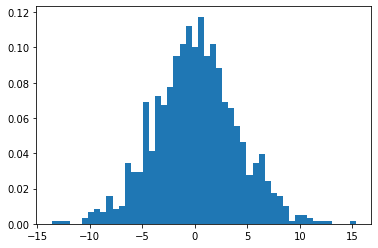

In [14]:
mu = 0; sigma = 4; N =1000
h = np.random.normal(mu, sigma, N)
ax = plt.hist(h, bins=50, density=True)

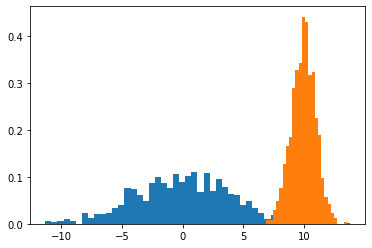

In [11]:
j = np.random.normal(mu+10, sigma-3, N)
ax = plt.hist(h, 50, density=True)
ax = plt.hist(j, 25, density=True)

### 2. Kernel density Estimation(Clustering)
- 서로 다른 2개의 그룹에서 관찰된 사실을 모른다는 가정에서 
- 자료의 밀도만 관찰하여 clustering을 하는 Density estimation
- 자료가 모두 정규분포에서 나왔다고 가정하여 KDE 커널로 Clustering

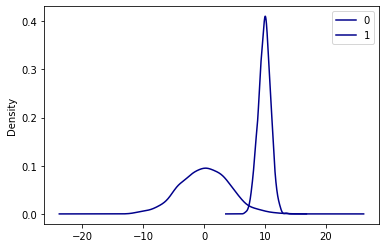

In [12]:
import pandas as pd
ax = pd.DataFrame(np.c_[h, j]).plot.kde(c='DarkBlue')  # kde kernel density estimation

### 3. 정규분포를 가정하여 확률밀도함수(Probability density function, pdf)로 예측
- 관측된 데이터를 pdf로 변환한 것은 Kernel function을 적용하여 Fitting(Traning) 한 것임
- Kernel transformation (Gaussian pdf kernel)

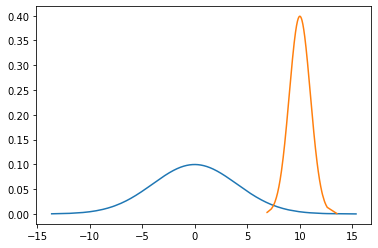

In [20]:
import scipy.stats as stats
h = sorted(h); j = sorted(j)
fit_h = stats.norm.pdf(h, mu, sigma) # it is a fitting! probability density function
fit_j = stats.norm.pdf(j, mu+10, sigma-3) # it is a fitting! probability density function
plt.plot(h, fit_h); plt.plot(j, fit_j)

In [21]:
pd.DataFrame(np.c_[h, fit_h, j, fit_j], 
                   columns = ['h', 'fit_h_gn(0,4)', 'j', 'fit_j_gn(10, 1)'])

,h,"fit_h_gn(0,4)",j,"fit_j_gn(10, 1)"
0,-13.602772,0.000307,6.887216,0.003140
1,-12.588239,0.000705,6.901785,0.003285
2,-11.889673,0.001203,7.284396,0.009990
3,-10.630538,0.002918,7.290753,0.010164
4,-10.315359,0.003587,7.427290,0.014576
...,...,...,...,...
995,10.962913,0.002332,12.381980,0.023381
996,11.655328,0.001429,12.481445,0.018357
997,12.167204,0.000977,12.563827,0.014913
998,12.594717,0.000701,12.607729,0.013312


### 5. Let's transform the values (-4 ~ +4) into pdf using Gaussian pdf(kernel)

,x2,x3
x1,,
-4.0,0.05,0.00
-3.0,0.24,0.00
-2.0,0.40,0.00
-1.0,0.24,0.05
0.0,0.05,0.24
1.0,0.00,0.40
2.0,0.00,0.24
3.0,0.00,0.05
4.0,0.00,0.00


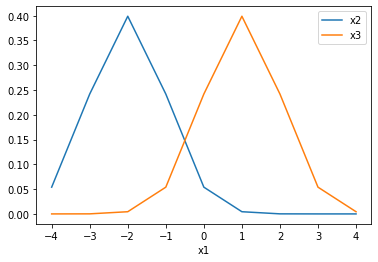

In [22]:
x1 = np.arange(-4, 5, 1) # x1 = np.arange(-4, 5, 0.1)
x2 = stats.norm.pdf(x1, -2, 1); x3 = stats.norm.pdf(x1, 1, 1)

data = pd.DataFrame(np.c_[x1, x2, x3], columns = ['x1', 'x2', 'x3'])
data.set_index('x1', inplace=True)
data.round(2)
data[['x2', 'x3']].plot()

#### TN와 TP의 영역에 있는 x1의 RBF변환값은 x2, x3가 둘중 하나는 '0'에 가까움
#### FN와 FP의 영역에 있는 x1의 RBF변환값은 x2, x3가 모두 '0' 보다 상당히 크다

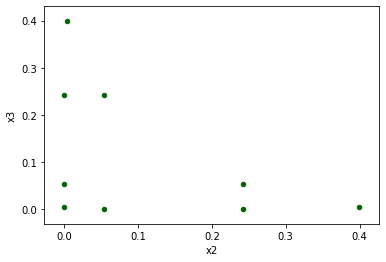

In [23]:
ax1 = data.plot.scatter(x='x2', y='x3', c='DarkGreen')

### 6. SVM : Let's transform the values (-4 ~ +4) into pdf using Gaussian RBF(kernel)

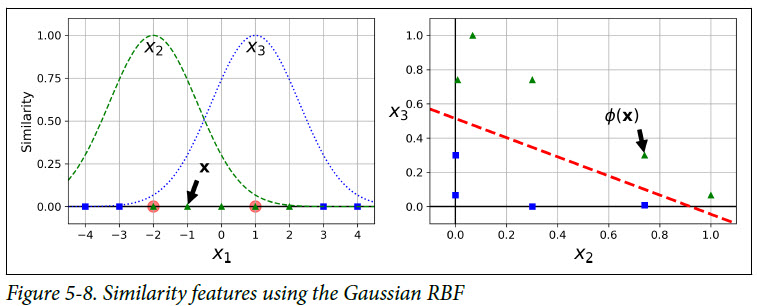

In [24]:
from IPython.display import Image
Image('../image/kernel/rbf.jpg', width=800, height=600)

# sklearn.gaussian_process.kernels.RBF
- https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html

In [25]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X[0:5]
y[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

array([0, 0, 0, 0, 0])

In [26]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X, y)
gpc.score(X, y)

0.9866666666666667

In [27]:
np.unique(y)
gpc.predict(X[:2,:])
gpc.predict_proba(X[:2,:])

array([0, 1, 2])

array([0, 0])

array([[0.83567134, 0.03205791, 0.13227075],
       [0.79156507, 0.06427124, 0.14416369]])

In [ ]:
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))]
x1.reshape(-1,1)
K = kernel(x1.reshape(-1,1), x1.reshape(-1,1)) # kernel at test Data , Gaussian Process squared exponential square

## like Covariance 

In [32]:
pd.DataFrame(K).round(2)

array([[-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4]])

,0,1,2,3,4,5,6,7,8
0,1.00,0.61,0.14,0.01,0.00,0.00,0.00,0.00,0.00
1,0.61,1.00,0.61,0.14,0.01,0.00,0.00,0.00,0.00
2,0.14,0.61,1.00,0.61,0.14,0.01,0.00,0.00,0.00
3,0.01,0.14,0.61,1.00,0.61,0.14,0.01,0.00,0.00
4,0.00,0.01,0.14,0.61,1.00,0.61,0.14,0.01,0.00
5,0.00,0.00,0.01,0.14,0.61,1.00,0.61,0.14,0.01
6,0.00,0.00,0.00,0.01,0.14,0.61,1.00,0.61,0.14
7,0.00,0.00,0.00,0.00,0.01,0.14,0.61,1.00,0.61
8,0.00,0.00,0.00,0.00,0.00,0.01,0.14,0.61,1.00


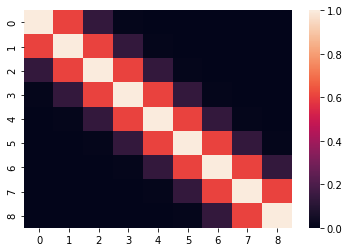

In [34]:
import seaborn as sns
sns.heatmap(pd.DataFrame(K))

# END